In [605]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from glob import glob
from PIL import Image
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [606]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator # ImageDataGenerator이미지 전처리
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [607]:
1551+950


2501

# 전처리 

# 불러올 사이즈 지정

In [608]:
# target_size
target_x=224
target_y=224

# 전처리 첫번째

첫번째 파일의 출혈

In [609]:
imgs_1_1 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/100출혈/*.png')
# imgs[:100]

In [610]:
# # 괜찮음 이걸로 감
xtrain_1_1=[]
for i in range(len(imgs_1_1)):
    xtrain_1_1.append(np.array(load_img(imgs_1_1[i],target_size=(target_x,target_y),color_mode = "grayscale")))  #Image는 열이 이상하게 생성되니 로드 이미지로 함.
    # color_mode를 흑백으로 줌으로써 1로 만든다.

In [611]:
imgs_1_2 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/100정상/*.png')
# imgs[:100]

두번째 파일의 정상

In [612]:
# # 괜찮음 이걸로 감
xtrain_1_2=[]
for i in range(len(imgs_1_2)):
    xtrain_1_2.append(np.array(load_img(imgs_1_2[i],target_size=(target_x,target_y),color_mode = "grayscale")))  #Image는 열이 이상하게 생성되니 로드 이미지로 함.

출혈, 정상 합성 

In [613]:
xtrain_1=np.concatenate((xtrain_1_1,xtrain_1_2),axis=0) # xtrain_1_1과 1_2 합침

In [614]:
np.shape(xtrain_1)

(200, 224, 224)

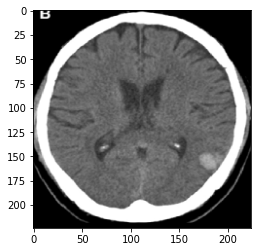

In [615]:
# 잘 나옴 이걸로 함.
plt.imshow(xtrain_1[2], cmap="gray")
plt.show()

In [616]:
# 라벨 데이터 리드
label_1=pd.read_csv("/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/100출혈, 100정상/labels.csv")
label_1

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [617]:
ytrain_1=list(label_1[" hemorrhage"])
# 1은 출혈, 0은 정상

In [618]:
ytrain_1[99]

1

In [619]:
ytrain_1[100]

0

# 이미지를 다른 이미지 파일과 합침

# 이미지 데이터 확인 0~99는 출혈, 이후 부터는 정상

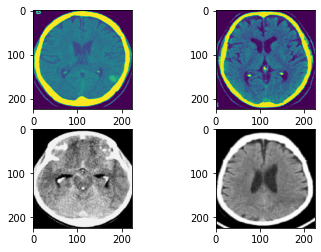

In [620]:
plt.subplot(2,2,1) # 수치적으로 점점 초록색 - 높은 값이 노랑색쪽 밝아진다. 
plt.imshow(xtrain_1[2]) 
plt.subplot(2,2,2) 
plt.imshow(xtrain_1[101]) # 흑백 plt.show()

plt.subplot(2,2,3) # 수치적으로 점점 초록색 - 높은 값이 노랑색쪽 밝아진다. 
plt.imshow(xtrain_1[4],cmap="gray") 
plt.subplot(2,2,4) 
plt.imshow(xtrain_1[104],cmap="gray") # 흑백 plt.show()

# 첫번째 종료 ======================================================================

# 두번째 시작 ==========================================================================

In [621]:
# 정상 파일임
# imgs_2 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/정상 81, 출혈 39/Brain_Data_Organised/Normal_정상_81/*.jpg')
# len(imgs_2)
# imgs_2[1]

In [622]:

# xtrain_2=[]
# for i in range(len(imgs_2)):
#     xtrain_2.append(np.array(load_img(imgs_2[i],target_size=(target_x,target_y),color_mode = "grayscale")))


In [623]:
# ytrain_2=[]
# for i in range(len(imgs_2)):
#     ytrain_2.insert(i,0) # i번째 인덱스에 0을 채움 1551개가 모두 정상이니 정상 0을 넣음.
    

In [624]:
# np.shape(xtrain_2) # (1551, 64, 64)

# 두번째 종료 ==========================================================================

# 세번째 시작 ======================================================================================

In [625]:
# 이건 출혈 상태.

# imgs_3 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/정상 81, 출혈 39/Brain_Data_Organised/Stroke_출혈 39/*.jpg')
# len(imgs_3)

In [626]:
# xtrain_3=[]
# for i in range(len(imgs_3)):
#     xtrain_3.append(np.array(load_img(imgs_3[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [627]:
# ytrain_3=[]
# for i in range(len(imgs_3)):
#     ytrain_3.insert(i,1) # i번째 인덱스에 1을 채움 950개를 모두 1로 채움 출혈이기에 1

In [628]:
# np.shape(xtrain_3)

# 세번째 종료 ==========================================================================

# 네번째 시작 ======================================================================================

In [629]:
# 이건 출혈 상태임. 트레인 출혈 1 정상 0

imgs_4 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Train/Hemorrhage/hemorrhage_images/*.jpg')
len(imgs_4)

825

In [630]:
xtrain_4=[]
for i in range(len(imgs_4)):
    xtrain_4.append(np.array(load_img(imgs_4[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [631]:
np.shape(xtrain_4)

(825, 224, 224)

In [632]:
ytrain_4=[]
for i in range(len(imgs_4)):
    ytrain_4.insert(i,1) # i번째 인덱스에 1을 채움 825개 1

In [633]:
len(ytrain_4)

825

#+ 네번째 종료 ==========================================================================

# 다섯번째 시작 ======================================================================================

In [634]:
# 이건 정상 상태임. 트레인 출혈 1 정상 0

imgs_5 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Train/Normal/normal_images/*.jpg')
len(imgs_5)

1426

In [635]:
xtrain_5=[]
for i in range(len(imgs_5)):
    xtrain_5.append(np.array(load_img(imgs_5[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [636]:
np.shape(xtrain_5)

(1426, 224, 224)

In [637]:
ytrain_5=[]
for i in range(len(imgs_5)):
    ytrain_5.insert(i,0) # i번째 인덱스에 0을 채워줌 1426개 이건 정상이라 0

In [638]:
len(ytrain_5)


1426

# 다섯번째 종료 ==========================================================================

# 테스트_1 시작 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [639]:
# 이건 출혈 상태임. 테스트 출혈 1 정상 0

imgs_6 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Test/Hemorrhage/hemorrhage_images/*.jpg')
len(imgs_6)

125

In [640]:
xtest_1=[]
for i in range(len(imgs_6)):
    xtest_1.append(np.array(load_img(imgs_6[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [641]:
np.shape(xtest_1)

(125, 224, 224)

In [642]:
ytest_1=[]
for i in range(len(imgs_6)):
    ytest_1.insert(i,1) # i번째 인덱스에 1을 채워줌 이건 출혈이라 1 125개

In [643]:
len(ytest_1)

125

# 테스트_1 종료 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# 테스트_2 시작 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [644]:
# 이건 정상 상태임. 테스트 출혈 1 정상 0

imgs_7 = glob('/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Test/Normal/normal_images/*.jpg')
len(imgs_7)

125

In [645]:
xtest_2=[]
for i in range(len(imgs_7)):
    xtest_2.append(np.array(load_img(imgs_7[i],target_size=(target_x,target_y),color_mode = "grayscale")))

In [646]:
ytest_2=[]
for i in range(len(imgs_7)):
    ytest_2.insert(i,0) # i번째 인덱스에 0을 채워줌 이건 정상이기 때문에 0 임.

In [647]:
len(ytest_2)

125

In [648]:
np.shape(xtest_2)

(125, 224, 224)

# 트레인, 테스트 데이터 분할 완료 
# 합치는 작업 시작

데이터 모양 확인

In [649]:
np.shape(xtrain_1) # 유지

(200, 224, 224)

In [650]:
np.shape(xtrain_2)  # 삭제

(1551, 64, 64)

In [651]:
np.shape(xtrain_3) # 삭제

(950, 64, 64)

In [652]:
np.shape(xtrain_4)  # 유지

(825, 224, 224)

In [653]:
np.shape(xtrain_5) # 유지

(1426, 224, 224)

In [654]:
np.shape(xtest_1) # 유지

(125, 224, 224)

In [655]:
np.shape(xtest_2)  # 유지

(125, 224, 224)

데이터가 정상적으로 들어간것 확인

In [656]:
imsi_1=np.concatenate((xtrain_1,xtrain_4),axis=0) # xtrain_1과 _2 합침

In [657]:
# imsi_2=np.concatenate((imsi_1,xtrain_3),axis=0) # (xtrain과 _2 )+_3합침

In [658]:
# imsi_3=np.concatenate((imsi_2,xtrain_4),axis=0)

In [659]:
imsi_4=np.concatenate((imsi_1,xtrain_5),axis=0)

In [660]:
imsi_4.shape

(2451, 224, 224)

In [661]:
np.shape(imsi_4)

(2451, 224, 224)

In [662]:
xtrain_all=imsi_4

In [663]:
ytrain_all=ytrain_1+ytrain_4+ytrain_5

In [664]:
len(ytrain_all)

2451

In [665]:
np.shape(xtrain_all)

(2451, 224, 224)

데이터 합성 완료 약 2600여개의 데이터[링크 텍스트](https://)

In [666]:
xtest_all=np.concatenate((xtest_1,xtest_2),axis=0) 

In [667]:
xtest_all.shape

(250, 224, 224)

In [668]:
np.shape(xtest_1)

(125, 224, 224)

In [669]:
np.shape(xtest_2)

(125, 224, 224)

In [670]:
ytest_all=ytest_1+ytest_2

In [671]:
len(ytest_all)

250

테스트 데이터 합성 완료 약 250개

트레인, 밸리데이션 데이터 분할 약 0.1로 분할

In [672]:
xtrain_all_s, xval, ytrain_all_s, yval = train_test_split(xtrain_all, ytrain_all, test_size=0.1, shuffle=True, random_state=1208)


# 데이터 합성, 분할, 전처리 완료

# 모델링


In [673]:
xtrain=xtrain_all_s.reshape(xtrain_all_s.shape[0], target_x,target_y, 1).astype('float32')/255  # 255로 스케일링
xtest=xtest_all.reshape(xtest_all.shape[0], target_x,target_y, 1).astype('float32')/255
xval=xval.reshape(xval.shape[0], target_x,target_y, 1).astype('float32')/255
ytrain=np_utils.to_categorical(ytrain_all_s) # 카테고리컬 했음. 그래서 바이너리로 하지 않고, 카테고리컬로 쭈움 감
ytest=np_utils.to_categorical(ytest_all)
yval=np_utils.to_categorical(yval)



In [674]:
model=Sequential()
model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
# padding 밸리드= 패팅x, same 은 동일한 패딩을 계속함.
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.20)) #25%는 제외
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20)) #50%는 제외
model.add(Dense(2, activation='softmax'))

In [675]:
#환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [676]:
# 모델 저장 경로 설정
if not os.path.exists("/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/"): # . 이 현재를 의미/ 현재 밑에
    os.mkdir("/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/")

In [677]:
modelpath="/content/drive/MyDrive/파이널 프로젝트_내꺼/final_project_covmodel/{epoch:02d}-{val_loss:4f}.hdf5"

In [678]:
cp=ModelCheckpoint(filepath=modelpath, monitor="val_loss", save_best_only=True)  # 가장 좋은 모델만 저장해라.

In [679]:
esc=EarlyStopping(monitor="val_loss", patience=10)

In [680]:
# history=model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=200, batch_size=200, callbacks=[cp, esc] )
# validation_split=0.1
# validation_data=(xtest,ytest)

일반적인 형태로 모델을 생성하였으나, 속도가 너무 느렸기에, GPU를 사용하여 다시 작업을 함.

In [681]:
model.evaluate(xtest, ytest) # 약 200여개의 데이터(train_1)로 모델을 생성하였을 때의 정확도 -> 메모리 부족 문제 때문에 train_1로만 돌려봄
# 8/8 [==============================] - 9s 55ms/step - loss: 0.6933 - accuracy: 0.4960
# [0.6933121681213379, 0.4959999918937683]

8/8 [==============================] - 3s 186ms/step - loss: 0.6930 - accuracy: 0.5000


[0.693035364151001, 0.5]

In [682]:
# GPU_ 사용 번호 확인
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


GPU를 통한 모델링 

In [683]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.20)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.

  

Epoch 1/200
735/735 [==============================] - 29s 38ms/step - loss: 0.5496 - accuracy: 0.7710 - val_loss: 0.2472 - val_accuracy: 0.9146
Epoch 2/200
735/735 [==============================] - 28s 38ms/step - loss: 0.1722 - accuracy: 0.9297 - val_loss: 0.0888 - val_accuracy: 0.9512
Epoch 3/200
735/735 [==============================] - 26s 35ms/step - loss: 0.1197 - accuracy: 0.9528 - val_loss: 0.2069 - val_accuracy: 0.9268
Epoch 4/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0695 - accuracy: 0.9732 - val_loss: 0.1229 - val_accuracy: 0.9553
Epoch 5/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0404 - accuracy: 0.9841 - val_loss: 0.1293 - val_accuracy: 0.9512
Epoch 6/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0427 - accuracy: 0.9828 - val_loss: 0.1834 - val_accuracy: 0.9512
Epoch 7/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0090 - accuracy: 0.9964 - val_loss: 0.2225 - val_ac

In [684]:
hist.history["accuracy"]

[0.7709750533103943,
 0.9297052025794983,
 0.9528344869613647,
 0.9732426404953003,
 0.9841269850730896,
 0.9827664494514465,
 0.996371865272522,
 0.9827664494514465,
 0.9895691871643066,
 0.9909297227859497,
 0.9832199811935425,
 0.9886621236801147]

In [685]:
# 가장 높은 정확도
best_score = max(history.history['accuracy'])

print(best_score)

0.993043065071106


In [686]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 81ms/step - loss: 3.4396 - accuracy: 0.8520


[3.4396378993988037, 0.8519999980926514]

In [687]:
model.summary() 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_195 (Conv2D)         (None, 224, 224, 256)     2560      
                                                                 
 conv2d_196 (Conv2D)         (None, 222, 222, 128)     295040    
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_197 (Conv2D)         (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 dropout_80 (Dropout)        (None, 54, 54, 64)      

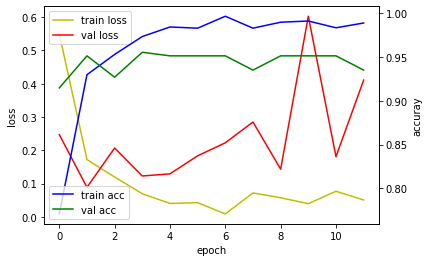

In [688]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # twinx() 축을 공유할때 사용하는 것임.
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# 몇 에폭에서 멈추는 것이 좋을까? 하면서 잡는것도 좋음. 
# val_loss가 올라가면 모델이 과적합에 빠진다. -> 과적합에 빠진것으로 보임.



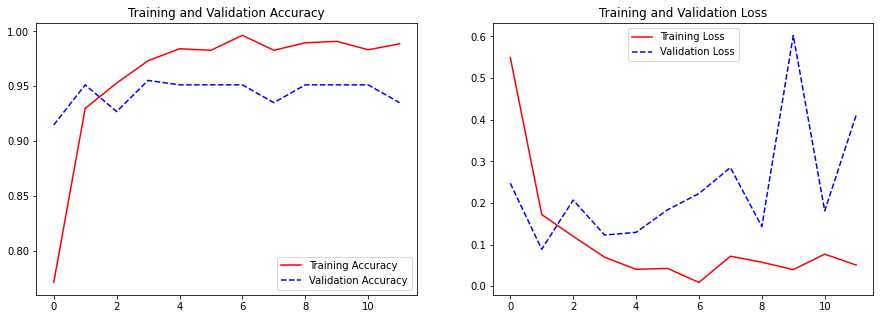

In [689]:
# Plot the training graph

def plot_training(history):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)

# 과대적합이 발견되어 과대적합을 줄이는 과정 진행

In [690]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  model.add(Dropout(0.20))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.50)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.

  

Epoch 1/200
735/735 [==============================] - 31s 41ms/step - loss: 0.5572 - accuracy: 0.7229 - val_loss: 0.3284 - val_accuracy: 0.8577
Epoch 2/200
735/735 [==============================] - 30s 41ms/step - loss: 0.2624 - accuracy: 0.8930 - val_loss: 0.1805 - val_accuracy: 0.9187
Epoch 3/200
735/735 [==============================] - 30s 41ms/step - loss: 0.1297 - accuracy: 0.9524 - val_loss: 0.1477 - val_accuracy: 0.9390
Epoch 4/200
735/735 [==============================] - 30s 41ms/step - loss: 0.1093 - accuracy: 0.9673 - val_loss: 0.1665 - val_accuracy: 0.9350
Epoch 5/200
735/735 [==============================] - 30s 41ms/step - loss: 0.0948 - accuracy: 0.9710 - val_loss: 0.1141 - val_accuracy: 0.9553
Epoch 6/200
735/735 [==============================] - 30s 41ms/step - loss: 0.0430 - accuracy: 0.9828 - val_loss: 0.1488 - val_accuracy: 0.9309
Epoch 7/200
735/735 [==============================] - 30s 41ms/step - loss: 0.0507 - accuracy: 0.9868 - val_loss: 0.2370 - val_ac

In [691]:
# 가장 높은 정확도
best_score = max(history.history['accuracy'])

print(best_score)

0.993043065071106


In [692]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 81ms/step - loss: 1.6579 - accuracy: 0.9040


[1.6579458713531494, 0.9039999842643738]

In [693]:
model.summary() 

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_198 (Conv2D)         (None, 224, 224, 256)     2560      
                                                                 
 dropout_82 (Dropout)        (None, 224, 224, 256)     0         
                                                                 
 conv2d_199 (Conv2D)         (None, 222, 222, 128)     295040    
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 dropout_83 (Dropout)        (None, 111, 111, 128)     0         
                                                                 
 conv2d_200 (Conv2D)         (None, 109, 109, 64)      73792     
                                                     

In [694]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  model.add(Dropout(0.20))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  # model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  # model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.50)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.


Epoch 1/200
735/735 [==============================] - 47s 63ms/step - loss: 0.4397 - accuracy: 0.7991 - val_loss: 0.2284 - val_accuracy: 0.9187
Epoch 2/200
735/735 [==============================] - 46s 63ms/step - loss: 0.1525 - accuracy: 0.9361 - val_loss: 0.2170 - val_accuracy: 0.9024
Epoch 3/200
735/735 [==============================] - 46s 63ms/step - loss: 0.0947 - accuracy: 0.9628 - val_loss: 0.2194 - val_accuracy: 0.9065
Epoch 4/200
735/735 [==============================] - 46s 63ms/step - loss: 0.0827 - accuracy: 0.9619 - val_loss: 0.1533 - val_accuracy: 0.9512
Epoch 5/200
735/735 [==============================] - 46s 63ms/step - loss: 0.1039 - accuracy: 0.9796 - val_loss: 0.2460 - val_accuracy: 0.9431
Epoch 6/200
735/735 [==============================] - 46s 63ms/step - loss: 0.0427 - accuracy: 0.9782 - val_loss: 0.2077 - val_accuracy: 0.9268
Epoch 7/200
735/735 [==============================] - 46s 63ms/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.2330 - val_ac

과대적합이 조정되지 않음

In [695]:
hist.history["accuracy"]

[0.7990929484367371,
 0.9360544085502625,
 0.9628117680549622,
 0.961904764175415,
 0.9795918464660645,
 0.9782313108444214,
 0.9786847829818726,
 0.9809523820877075,
 0.9841269850730896,
 0.9863945841789246,
 0.9913831949234009,
 0.9918367266654968,
 0.9904761910438538,
 0.9922902584075928]

In [696]:
# 가장 높은 정확도
best_score = max(history.history['accuracy'])

print(best_score)

0.993043065071106


In [697]:
model.evaluate(xtest,ytest)  # loss와 정확도

8/8 [==============================] - 1s 95ms/step - loss: 1.6729 - accuracy: 0.8800


[1.672926425933838, 0.8799999952316284]

In [698]:
model.summary() 

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_201 (Conv2D)         (None, 224, 224, 256)     2560      
                                                                 
 dropout_86 (Dropout)        (None, 224, 224, 256)     0         
                                                                 
 dropout_87 (Dropout)        (None, 224, 224, 256)     0         
                                                                 
 conv2d_202 (Conv2D)         (None, 222, 222, 64)      147520    
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 dropout_88 (Dropout)        (None, 111, 111, 64)      0         
                                                     

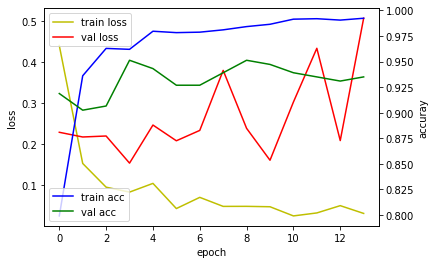

In [699]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # twinx() 축을 공유할때 사용하는 것임.
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# 몇 에폭에서 멈추는 것이 좋을까? 하면서 잡는것도 좋음. 
# val_loss가 올라가면 모델이 과적합에 빠진다. -> 과적합에 빠진것으로 보임.



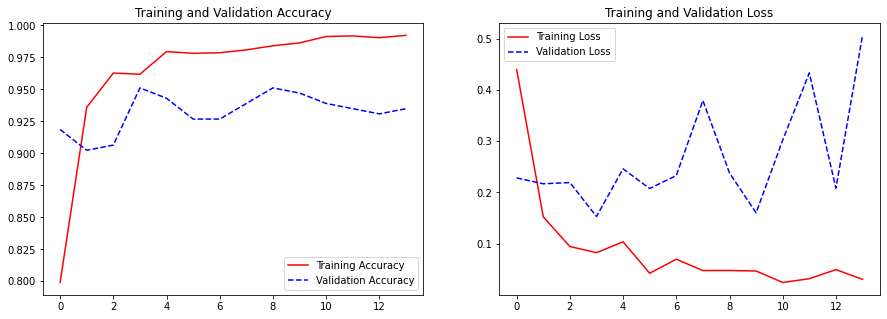

In [700]:
# Plot the training graph

def plot_training(history):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    
    plt.show()
    
plot_training(history)

# 전이학습

In [701]:
from keras.applications import vgg16

In [702]:
model_vgg16 = vgg16.VGG16()

In [703]:
model_vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [704]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # 위와 같은 형태의 한층을 추가했을 때는 모델의 정확도가 65% 정도 나왔으나, 삭제를 통해 정확도가 급상승

  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외  # 과대 적합 방지용 드롭아웃
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.20)) #20%는 제외 # 과대 적합 방지용 드롭아웃
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 
  hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )

  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소스 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함. -> 사이즈에서 문제가 생겨서 수정을 가했던 흔적 
  # 수정은 약 1차 650-> 512 -> 256 -> 128 -> 64 까지 사이즈 조정 
  # 1차로는 전체 파일의 숫자를 주리는 작업도 진행, 이후 3으로 되어있던, 컬러 형태를 1로 작업까지 진행해줌.


Epoch 1/200
735/735 [==============================] - 27s 35ms/step - loss: 0.5809 - accuracy: 0.6993 - val_loss: 0.4772 - val_accuracy: 0.7683
Epoch 2/200
735/735 [==============================] - 26s 35ms/step - loss: 0.2835 - accuracy: 0.8830 - val_loss: 0.2074 - val_accuracy: 0.8984
Epoch 3/200
735/735 [==============================] - 26s 35ms/step - loss: 0.1219 - accuracy: 0.9488 - val_loss: 0.1955 - val_accuracy: 0.8984
Epoch 4/200
735/735 [==============================] - 26s 35ms/step - loss: 0.1221 - accuracy: 0.9596 - val_loss: 0.1650 - val_accuracy: 0.9187
Epoch 5/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0691 - accuracy: 0.9746 - val_loss: 0.2096 - val_accuracy: 0.9268
Epoch 6/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.3435 - val_accuracy: 0.9187
Epoch 7/200
735/735 [==============================] - 26s 35ms/step - loss: 0.0866 - accuracy: 0.9810 - val_loss: 0.1370 - val_ac

In [705]:

model_vgg16 = vgg16.VGG16(include_top=False, weights='imagenet',input_shape = (224,224,3))

bottleneck_features_train = model.predict_generator( #VGG16을 통해 이미지 특징점 추출 및 저장
        generator, generator.samples // batch_size) 

NameError: ignored

In [706]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

In [715]:
conv_layers = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(target_x,target_y, 3))
conv_layers.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [709]:
# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


In [710]:
# 새로운 모델 생성하기

model = models.Sequential()

In [711]:
# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)

In [712]:
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))


In [713]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy']) 
hist=model.fit(xtrain, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )


Epoch 1/200


ValueError: ignored

In [ ]:

# 모델
model.summary()


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024, activation='relu')(x)

In [ ]:
# 로지스틱 레이어를 더합니다 -- 200가지 클래스가 있다고 가정합니다
predictions = Dense(200, activation='softmax')(x)


# 이미지 증식


In [ ]:
# 증식 이미지 옵션 설정
train_datagen=ImageDataGenerator(rotation_range=90,# rotation_range=15 ,0~15도 에서 회전
                                 width_shift_range=0.5, # 24*24 24 픽셀임 -> 0.5 0~12 픽셀 이내로 좌/우 이동
                                 height_shift_range=0.5, # 위아래 12픽셀씩 이동
                                 shear_range= 0.5,
                                 zoom_range=0.5, # 1-05 ,1+0.5 안에서 줌 축소. 아니면 최소 [0.2, 5] 최소 0.2~ 5배 까지 이런식도 가능
                                 horizontal_flip=True,
                                 vertical_flip=True, # 상하,좌우 반전은 항상 해줄 것
                                 
                                 rescale=1./255) 
# 255 인 이유는 숫자가 256까지 존재하기 때문임.
# 우리는 여기서 정규화만 하고, 이미지에 다른 무언가를 가하지 않음. 회전이나, 이런것도
# 사실상 증식된것이 없음.
# rotation_range: 정수. 무작위 회전의 각도 범위입니다. 이미지 증식 때 마다 랜덤으로 회전시켜줌

In [ ]:
train_generator_1=train_datagen.flow_from_directory( 
"/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Train", # 이미지 데이터 경로
    target_size=(target_x,target_y), # 타겟 사이즈를 내가 알아서 줄 수 있다. 타겟 이미지 크기가 24*24로 조절된다. 
    batch_size=3, #  폴더에 파일이 15개씩 들어가 있음. 1이면 15번 배치해야 전체데이터를 불러올 수 있음.
    # 그러니까 3이면 5번만 불러오면 됨.채널이랑은 다른거임. train 폴더 밑에 있는 모든 폴더에 대해서 한번에 3개씩 파일을 불러옴
    class_mode="categorical" # 분류를 어떤식으로 하겠느냐? categorical 다중 분류, binary 는 이진분류
    

)



In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255) # 255 인 이유는 숫자가 256까지 존재하기 때문임.


In [ ]:
test_generator=test_datagen.flow_from_directory( 
"/content/drive/MyDrive/파이널 프로젝트_내꺼/CT데이터/1000출혈, 1000정상/Test", # 이미지 데이터 경로
    target_size=(target_x,target_y), # 타겟 사이즈를 내가 알아서 줄 수 있다. 타겟 이미지 크기가 24*24로 조절된다. 
    batch_size=3, #  폴더에 파일이 15개씩 들어가 있음. 1이면 15번 배치해야 전체데이터를 불러올 수 있음.
    # 그러니까 3이면 5번만 불러오면 됨.채널이랑은 다른거임. train 폴더 밑에 있는 모든 폴더에 대해서 한번에 3개씩 파일을 불러옴
    class_mode="categorical" # 분류를 어떤식으로 하겠느냐? categorical 다중 분류, binary 는 이진분류
    

)

In [ ]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Conv2D(256, kernel_size=(3,3),padding="same", input_shape=(target_x,target_y, 1), activation='relu'))
  # padding 밸리드= 패팅x, same 은 동일한 패딩을 계속하는 것임.
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.20)) #20%는 제외
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.20)) #20%는 제외
  model.add(Dense(2, activation='softmax')) 
  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) # mae, rmse, recall, auc -> 경험적인것 
  # history=model.fit_generator(train_generator, ytrain, validation_data=(xval,yval), epochs=200, batch_size=3, callbacks=[cp, esc] )
  # history = model.fit_generator(xtrain, ytrain,epochs=20,validation_data=(xtest,ytest)) # ImageDataGenerator 이걸 사용해서 제네레이터로 생성된 경우 fit_generator 사용, 아니면 그냥 fit 사용임.

  # gpu 리소트 에러남. 이거 좀 설정해줘야 함. 전체 사이즈를 줄이던가 해야 함.

  model.fit_generator(train_generator_1,steps_per_epoch=81, # 1에포크 동안 제너레이터에서 생성할 샘플의 총 개수 보통 데이터 총수/ 배치크기 45/3 = 15 정도 줌
    # 45개의 이미지가 있음. 3개폴더 15개씩
    epochs=30, # 전체 훈련 수
    validation_data=test_generator,# 밸리데이션 데이터, 밸리데이션 스텝
    validation_steps=15) # 15개 점증데이터가 존재, 배치사이즈 3 이므로 5스탭 15/3 한 에포크 마다 몇개씩 검증할지

In [ ]:
250/3

In [ ]:
model.summary() 